This is my first time trying to understand neural networks. I try to start with as simple as possible network. To really gain understanding what happens within algorithm I try to code neural network from scratch using so few libraries as possible.

$$c = \sqrt{a^2 + b^2}$$

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

Data

In [151]:
hours = [0.50, 0.75, 1.00, 1.25, 1.50, 1.75, 1.75, 2.00, 2.25, 2.50, 2.75, 3.00, 3.25, 3.50, 4.00, 4.25, 4.50, 4.75, 5.00, 5.50]
passed = [0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1]

hours = np.reshape(hours, (len(hours), 1))
passed = np.reshape(passed, (len(passed), 1))

test_y = []
test_x = []

for i in range(200):
    test_y.append(np.sin(i/20) + np.random.normal()/10)
    test_x.append(i/20)

test_y = np.reshape(test_y, (len(test_y), 1))
test_x = np.reshape(test_x, (len(test_x), 1))

In [ ]:
def forward(w1, x, b1):
    return np.dot(x, w1) + b1

In [ ]:
def activation_function(Z):
    return np.log(1 + np.exp(Z))

In [ ]:
def forward_propagation(w2, X2, b3):
    return np.dot(X2, w2.T) + b3

In [152]:
def loss_function(y, y_pred):
    return np.sum((y - y_pred) ** 2)

In [ ]:
def backward_propagation(y, y_pred, X, w1, w2, b, b3, learning_rate):
    y_pred = np.reshape(y_pred, (len(y_pred), 1))

    dw1 = sum(-2 * (y - y_pred) * w2 * np.exp(forward(w1, X, b)) / (1 + np.exp(forward(w1, X, b))) * X)

    db = sum(-2 * (y - y_pred) * w2 * np.exp(forward(w1, X, b)) / (1 + np.exp(forward(w1, X, b))) * 1)

    dw2 = sum(-2 * (y - y_pred) * activation_function(forward(w1, X, b)))

    db3 =  sum(-2 * (y - y_pred))

    w1 = w1 - dw1 * learning_rate
    w2 = w2 - dw2 * learning_rate
    b = b - db * learning_rate
    b3 = b3 - db3 * learning_rate
    return w1, w2, b, b3

In [153]:
def train(y, x, w1, w2, b, b3, iter, learning_rate):
    losses = []
    y_pred = []
    for i in range(iter):
        first = forward(w1, x, b)
        Z = activation_function(first)
        y_pred = forward_propagation(w2, Z, b3)
        losses.append(loss_function(x, y_pred))
        w1, w2, b, b3 = backward_propagation(y, y_pred, x, w1, w2, b, b3, learning_rate)
    return losses, y_pred

number_of_nodes = 20

iterations = 100000
learning_rate = 0.0001
weight_1 = np.random.normal(size=number_of_nodes)
weight_1 = np.reshape(weight_1, (1, len(weight_1)))
weight_2 = np.random.normal(size=number_of_nodes)
weight_2 = np.reshape(weight_2, (1, len(weight_2)))
bias, bias_3 = [0] * len(weight_1), 0

sp, y_pred = train(test_y, test_x, weight_1, weight_2, bias, bias_3, iterations, learning_rate)

In [154]:
y_pred

array([[-0.22649098],
       [-0.39464468],
       [-0.391749  ],
       [-0.32327623],
       [-0.23638147],
       [-0.15057148],
       [-0.07264335],
       [-0.00387831],
       [ 0.05657382],
       [ 0.11017065],
       [ 0.15834497],
       [ 0.20228465],
       [ 0.24289231],
       [ 0.28081449],
       [ 0.31649135],
       [ 0.35020597],
       [ 0.38212638],
       [ 0.41233862],
       [ 0.44087181],
       [ 0.46771662],
       [ 0.49283873],
       [ 0.51618846],
       [ 0.53770766],
       [ 0.55733459],
       [ 0.57500734],
       [ 0.59066629],
       [ 0.60425576],
       [ 0.61572521],
       [ 0.62502997],
       [ 0.63213181],
       [ 0.63699922],
       [ 0.63960758],
       [ 0.63993925],
       [ 0.6379835 ],
       [ 0.63373642],
       [ 0.62720082],
       [ 0.61838598],
       [ 0.60730749],
       [ 0.59398697],
       [ 0.57845184],
       [ 0.56073504],
       [ 0.54087472],
       [ 0.51891403],
       [ 0.49490079],
       [ 0.46888725],
       [ 0

In [155]:
sp

[3472.040654174357,
 677839.727958367,
 136499074.60942566,
 257171.64715964574,
 192091.06558587315,
 179069.05217351625,
 167093.47563674432,
 156044.9344999171,
 145834.9558467452,
 136390.50085139505,
 127648.25795646418,
 119551.95372876851,
 112050.85225366347,
 105098.8059900049,
 98653.59701694666,
 92676.44842715841,
 87131.64501808936,
 81986.22965434327,
 77209.75487867797,
 72774.07603959262,
 68653.17579448808,
 64823.01200947243,
 61261.38264578117,
 57947.802586754005,
 54863.388651091176,
 51990.75025146932,
 49313.88422834947,
 46818.07325008989,
 44489.78778382708,
 42316.59200680613,
 40287.05417749182,
 38390.661971996895,
 36617.74317147931,
 34959.39191161358,
 33407.40051510179,
 31954.196747041377,
 30592.786171649357,
 29316.699146359853,
 28119.94185437976,
 26996.950627658945,
 25942.548613201947,
 24951.903527573028,
 24020.484723687878,
 23144.016867089867,
 22318.42580272291,
 21539.768884410456,
 20804.13535060842,
 20107.488013384478,
 19445.38467767194,

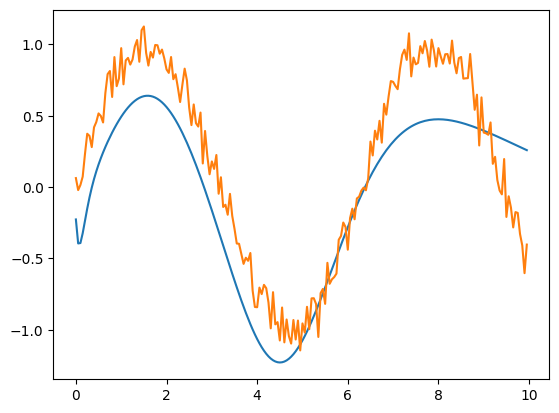

In [156]:
plt.plot(test_x, y_pred)
plt.plot(test_x, test_y)